In [2]:
:dep nnn = { path = ".." }
:dep petgraph

use nnn::Float64;
use petgraph::{
    dot::Dot,
    visit::{NodeRef},
};

In [3]:
macro_rules! render_graph {
    ($root:expr) => {
        let graph = nnn::to_graph($root);
        let graph = nnn::draw_dot(
            Dot::with_attr_getters(
                &graph,
                &[],
                &|_, _| String::from(""),
                &|_, node| if node.weight().contains('|') {
                    String::from("shape=record")
                } else {
                    String::from("shape=circle")
                },
            ),
            &["-Tpng"],
        );
        nnn::evcxr_render_as("image/png", graph);
    }
}

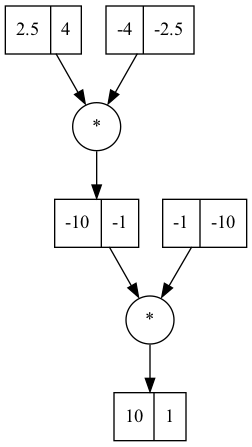

In [4]:
{
    let a = Float64::from(2.5);
    let b = Float64::from(-4.0);
    let c = &a * &b * -1.0;

    c.backward();
    render_graph!(&c);
}

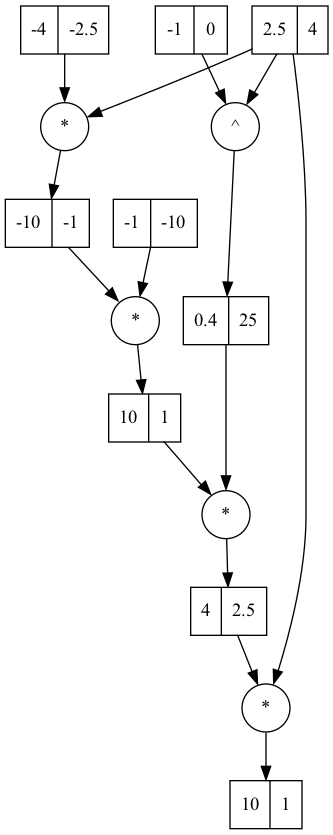

In [5]:
{
    let a = Float64::from(2.5);
    let b = Float64::from(-4.0);
    let c = &a * &b * -1.0;
    // gradient of `a` should remain the same as above
    let d = &c / &a * &a;

    d.backward();
    render_graph!(&d);
}

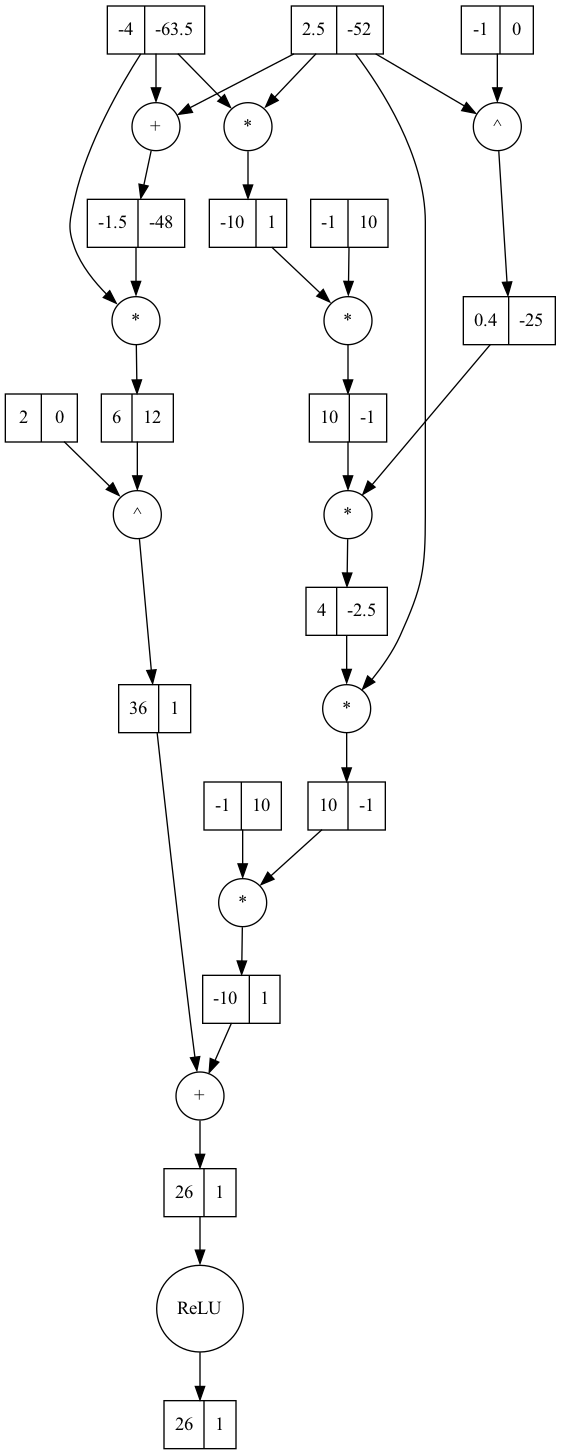

In [6]:
{
    let a = Float64::from(2.5);
    let b = Float64::from(-4.0);
    let c = &a * &b * -1.0;
    let d = &c / &a * &a;
    let e = &b * (&a + &b);
    let f = e.pow(2.0) - &d;
    let g = f.relu();

    g.backward();
    render_graph!(&g);
}